<a href="https://colab.research.google.com/github/lipecamara/portifolio/blob/main/An%C3%A1lise_de_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de vendas de uma loja de varejo.

### link para os dados: https://www.kaggle.com/datasets/ishanshrivastava28/superstore-sales


In [ ]:
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.dates as mdates
import datetime
import numpy as np
import warnings

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/lipecamara/analise_de_vendas/refs/heads/lipecamara-patch-2/vendas.csv')
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [ ]:
# definindo as cores

CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, CINZA6 = '#323232', '#595959', '#717171', '#8e8e8e', '#a2a2a2', '#b4b4b4'
AZUL0, AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#4d6a95', '#4472c4', '#638ed0', '#71a1eb', '#8faadc', '#79aeff', '#bfcee5'
VERMELHO1, VERMELHO2, VERMELHO3, VERMELHO4, VERMELHO5 = '#e40700', '#ff0b04', '#ff4842', '#ff6e69', '#ff9591'
LARANJA1, LARANJA2, LARANJA3, LARANJA4, LARANJA5 = '#d65501', '#ec5d01', '#ff6704', '#ff8435', '#ffa56b'
VERDE0, VERDE1, VERDE2, VERDE3, VERDE4, VERDE5, VERDE6 = '#0b7666', '#0e806f', '#16a08b', '#19b39c', '#1ccaaf', '#20dec1', '#25f4d5'

In [ ]:
# Retirando as colunas que não serão usadas na análise.

df.drop(['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Country','Postal Code', 'Product ID', 'Product Name'], axis = 1, inplace = True)

In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    9993 non-null   object 
 1   Ship Date     9993 non-null   object 
 2   Ship Mode     9993 non-null   object 
 3   Segment       9993 non-null   object 
 4   City          9993 non-null   object 
 5   State         9993 non-null   object 
 6   Region        9993 non-null   object 
 7   Category      9993 non-null   object 
 8   Sub-Category  9993 non-null   object 
 9   Sales         9993 non-null   float64
 10  Quantity      9993 non-null   int64  
 11  Discount      9993 non-null   float64
 12  Profit        9993 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


In [ ]:
# Colocando os dados de data no formato datetime

df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%d-%m-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format = '%d-%m-%Y')

In [ ]:
# Código para traduzir os nomes das colunas

df.columns = ['Data_pedido', 'Data_envio', 'Tipo_envio', 'Seguimento', 'Cidade', 'Estado', 'Regiao', 'Departamento', 'Categoria', 'Vendas', 'Quantidade', 'Desconto', 'Lucro']

In [ ]:
# Dados de vendas e lucro para float com duas cadas decimais

df['Vendas'] = df['Vendas'].round(2)
df['Lucro'] = df['Lucro'].round(2)

In [ ]:
# Traduçaõ dos dados

df['Tipo_envio']= df['Tipo_envio'].map({'Second Class':'Segunda Classe', 'Standard Class': 'Entrega Padrão', 'First Class':'Primeira Classe', 'Same Day':'Mesmo Dia'})
df['Seguimento'] = df['Seguimento'].map({'Consumer':'B2C', 'Corporate':'B2B', 'Home Office':'B2C'})
df['Regiao'] = df['Regiao'].map({'South':'Sul', 'West':'Oeste', 'Central':'Central', 'East':'Leste'})
df['Departamento'] = df['Departamento'].map({'Furniture':'Mobília', 'Office Supplies':'Material de Escritório', 'Technology':'Eletrônicos'})
df['Categoria'] = df['Categoria'].map({'Bookcases':'Estantes', 'Chairs':'Cadeiras', 'Labels':'Etiquetas', 'Tables':'Mesas', 'Storage':'Armazenamento',
       'Furnishings':'Móveis', 'Art':'Arte', 'Phones':'Telefones', 'Binders':'Fichários', 'Appliances':'Eletrodomésticos', 'Paper':'Papelaria',
        'Accessories':'Acessórios', 'Envelopes':'Invólucros', 'Fasteners':'Colchetes', 'Supplies':'Suprimentos', 'Machines':'Eletrônicos de Escritório',
       'Copiers':'Copiadoras'})

In [ ]:
lucro_anual = df.copy()
lucro_anual['Ano'] = lucro_anual['Data_pedido'].dt.year
lucro_anual = lucro_anual.groupby('Ano')[['Lucro']].sum()
lucro_anual['Crescimento'] = lucro_anual['Lucro'].pct_change().round(3)
lucro_anual.reset_index(inplace=True)
lucro_anual

,Ano,Lucro,Crescimento
0,2011,49555.92,NaN
1,2012,61618.44,0.243
2,2013,81726.66,0.326
3,2014,93507.58,0.144


In [ ]:
# função para texto colorido

from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

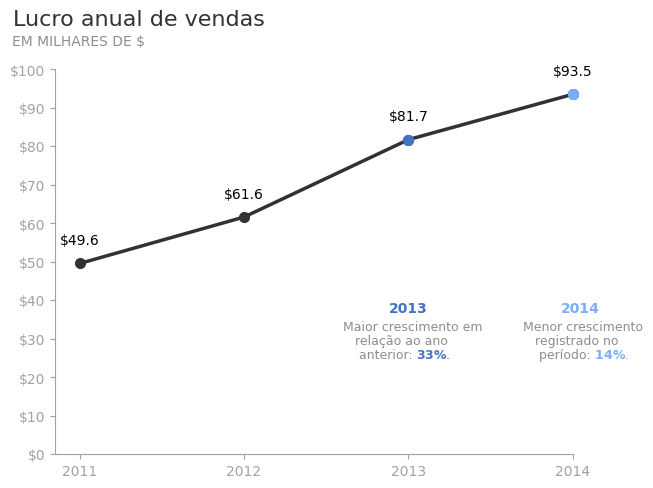

In [ ]:
def formata_tick(x, pos):
   return f'${x/1000:,.0f}'.replace(',', '.')

fig, ax = plt.subplots(figsize = (7, 5))

ax.yaxis.set_major_formatter(formata_tick)

ax.plot(lucro_anual['Ano'], lucro_anual['Lucro'], color = CINZA1, lw = 2.5, marker = 'o', markersize = 7)
ax.plot(lucro_anual['Ano'][2], lucro_anual['Lucro'][2], marker = 'o', markersize = 7, color = AZUL1)
ax.plot(lucro_anual['Ano'][3], lucro_anual['Lucro'][3], marker = 'o', markersize = 7, color = AZUL5)
fig.suptitle('Lucro anual de vendas', color = CINZA1, fontsize = 16, ha = 'right', x = 0.425, y = 1)
ax.set_title('EM MILHARES DE $', loc = 'left', size = 10, color = CINZA4, x = -0.08, y = 1.04)
ax.xaxis.set_major_locator(plt.MultipleLocator())
ax.yaxis.set_major_locator(plt.MultipleLocator(1e4))
ax.spines[["top", "right"]].set_visible(False)
ax.tick_params(axis = 'both', which='both', color = CINZA5)
ax.xaxis.set_tick_params(labelsize=10, labelcolor = CINZA5)
ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA5)
ax.spines[['bottom', 'left']].set_color(CINZA5)
plt.ylim(0, 1e5)
ax.spines.bottom.set_bounds(ax.get_xlim()[0], 2014)

for i in range(0, len(lucro_anual['Ano'])):
  ax.text(x = lucro_anual['Ano'][i], y = lucro_anual['Lucro'][i] + 5e3, s = f"${lucro_anual['Lucro'][i]/1000:.1f}", color = 'k', fontsize = 10, ha = 'center')

text = ax.text(x = 0.615, y = 0.37, s = '2013', color = AZUL1, fontsize = 10, transform = ax.transAxes, weight = 'bold')
text = ax.text(x = 0.932, y = 0.37, s = '2014', color = AZUL5, fontsize = 10, transform = ax.transAxes, weight = 'bold')
texto_colorido(2012.6, 2.5e4,
               'Maior crescimento em\n'
               '   relação ao ano\n'
               '    anterior: ||$\\bf{33\%}$.',
               cores = [[CINZA4], [CINZA4], [CINZA4, AZUL1]],
               esp = 14,
               ax = ax,
               fontsize = 9)


texto_colorido(2013.7, 2.5e4,
               'Menor crescimento\n'
               '   registrado no\n'
               '    período:|| $\\bf{14\%}$.',
               cores = [[CINZA4], [CINZA4], [CINZA4, AZUL5]],
               esp = 14,
               ax = ax,
               fontsize = 9)



plt.show()

In [ ]:
df['Ano'] = df['Data_pedido'].dt.year
qtd_vendas_regiao = df.groupby(['Regiao', 'Ano'])['Vendas'].agg('count').reset_index()
qtd_vendas_regiao = pd.crosstab(index = qtd_vendas_regiao['Ano'], columns = qtd_vendas_regiao['Regiao'], values = qtd_vendas_regiao['Vendas'], aggfunc='sum', normalize='index')
qtd_vendas_regiao = (qtd_vendas_regiao * 100).round(2)
qtd_vendas_regiao = qtd_vendas_regiao[['Oeste', 'Leste', 'Central', 'Sul']]

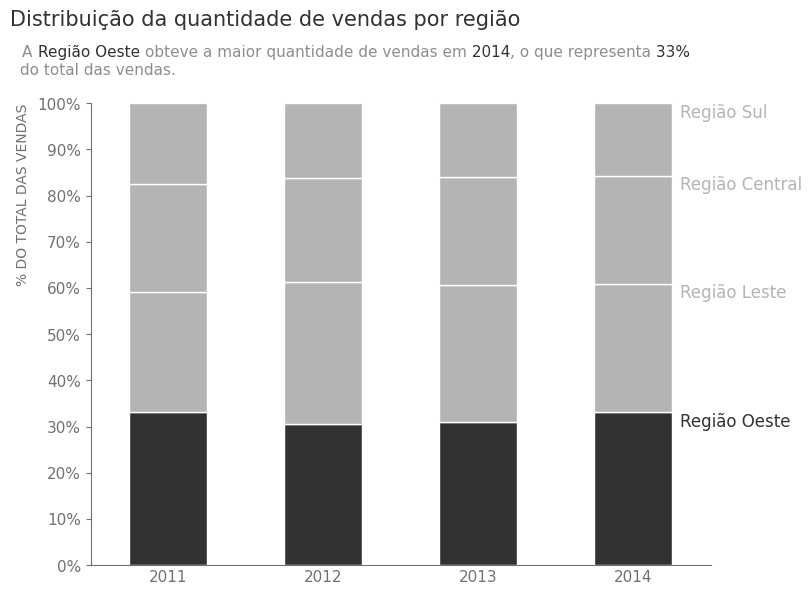

In [ ]:
cores = [CINZA1, CINZA6, CINZA6, CINZA6]

def formata_tick(x, pos):
   return f'{x:.0f}%'

ax = qtd_vendas_regiao.plot(kind = 'bar', stacked = True, figsize=(8, 6), color = cores, width = 0.5, ec = 'white')
ax.set_title('Distribuição da quantidade de vendas por região', fontsize = 15, loc = 'left', color = CINZA1, x = -0.13, y = 1.15)
text = ax.text(x= -0.11, y = 1.1, s = 'A ', fontsize = 11, color = CINZA4, transform = ax.transAxes)
text = ax.annotate('Região Oeste ', xycoords=text, xy = (1, 0), fontsize = 11, color = CINZA1, va = 'bottom')
text = ax.annotate('obteve a maior quantidade de vendas em', xycoords=text, xy = (1, 0), fontsize = 11, color = CINZA4, va = 'bottom')
text = ax.annotate(' 2014', xycoords=text, xy = (1, 0), fontsize = 11, color = CINZA1, va = 'bottom')
text = ax.annotate(', o que representa', xycoords=text, xy = (1, 0), fontsize = 11, color = CINZA4, va = 'bottom')
text = ax.annotate(' 33%', xycoords=text, xy = (1, 0), fontsize = 11, color = CINZA1, va = 'bottom')
text = ax.annotate(' do total das vendas.', xycoords=text, xy = (-16.3, -0.2), fontsize = 11, color = CINZA4, va = 'top')

ax.xaxis.set_tick_params(labelsize=11, labelcolor = CINZA3, rotation = 0)
ax.yaxis.set_tick_params(labelsize=11, labelcolor = CINZA3)
ax.set_xlabel('')
ax.set_ylabel('% DO TOTAL DAS VENDAS', loc = 'top', size = 10, color = CINZA3, labelpad = 5)
ax.tick_params(axis='x', which='both', length=0)
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_formatter(formata_tick)
ax.tick_params(axis = 'both', which='both', color = CINZA3)
ax.spines[["top", "right"]].set_visible(False)
ax.spines[['bottom', 'left']].set_color(CINZA3)
plt.ylim(0, 100)
ax.legend().remove()

soma = 0
for i in range(0, len(qtd_vendas_regiao.columns)):
  soma+= qtd_vendas_regiao.iloc[3, i]
  ax.text(x = 3.3, y = soma, s= f'Região {qtd_vendas_regiao.columns[i]}', color = cores[i], fontsize = 12, va = 'top')


plt.show()

In [ ]:
lucro_categoria = df.groupby(['Categoria'])[['Lucro']].sum().sort_values(by='Lucro', ascending=False)
lucro_categoria.reset_index(inplace=True)

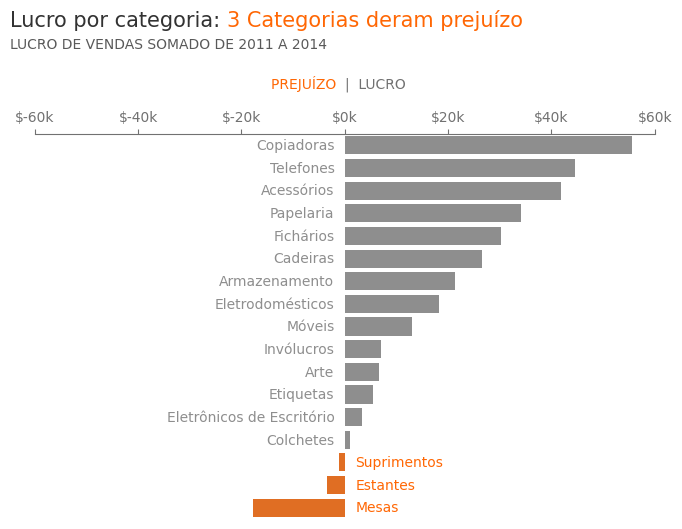

In [ ]:
def formata_tick(x, pos):
   return f'${x/1000:.0f}k'

cores = [CINZA4, CINZA4, CINZA4, CINZA4, CINZA4, CINZA4, CINZA4, CINZA4, CINZA4, CINZA4, CINZA4, CINZA4, CINZA4, CINZA4, LARANJA3, LARANJA3, LARANJA3]
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(data = lucro_categoria, x = 'Lucro', y = 'Categoria', palette = cores, hue = lucro_categoria.index, legend = False)
ax.set_title('LUCRO DE VENDAS SOMADO DE 2011 A 2014', color = CINZA2, size = 10, loc = 'left', x = -0.04, y=1.20)
ax.xaxis.set_ticks_position("top")
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_xlim(-6e4, 6e4)
ax.xaxis.set_tick_params(labelsize=10, labelcolor = CINZA3)
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis = 'x', which='both', color = CINZA3)
ax.spines[['right', 'left', 'bottom']].set_visible(False)
ax.spines['top'].set_color(CINZA3)
ax.xaxis.set_major_formatter(formata_tick)
text = ax.text(x = -0.04, y = 1.28, s = 'Lucro por categoria: ', fontsize = 15, color = CINZA1, transform = ax.transAxes)
ax.annotate('3 Categorias deram prejuízo', xycoords=text, xy=(1, 0), verticalalignment="bottom", fontsize = 15, color = LARANJA3)
offset = 2e3

text = ax.text(x = 0.5, y = 1.12, s = 'PREJUÍZO  ', fontsize = 10, color = LARANJA3, transform = ax.transAxes,ha='right')
ax.annotate('|  LUCRO', xycoords=text, xy = (1, 0), verticalalignment="bottom", fontsize = 10, color = CINZA3)

for i in range(0, len((lucro_categoria['Categoria']))):
  if lucro_categoria['Lucro'][i] > 0:
    ax.text(x = 0 - offset, y = i, s = lucro_categoria['Categoria'][i], color = cores[i], fontsize = 10, ha='right', va = 'center')
  else:
    ax.text(x = 0 + offset, y = i, s = lucro_categoria['Categoria'][i], color = cores[i], fontsize = 10, va = 'center')

plt.show()

In [ ]:
lucro_categoria_anual = df.groupby(['Categoria', 'Ano'])[['Lucro']].sum()
lucro_categoria_anual.reset_index(inplace = True)
eletronicos_escritorio = lucro_categoria_anual[lucro_categoria_anual['Categoria'] == 'Eletrônicos de Escritório']
eletronicos_escritorio.reset_index(inplace = True)

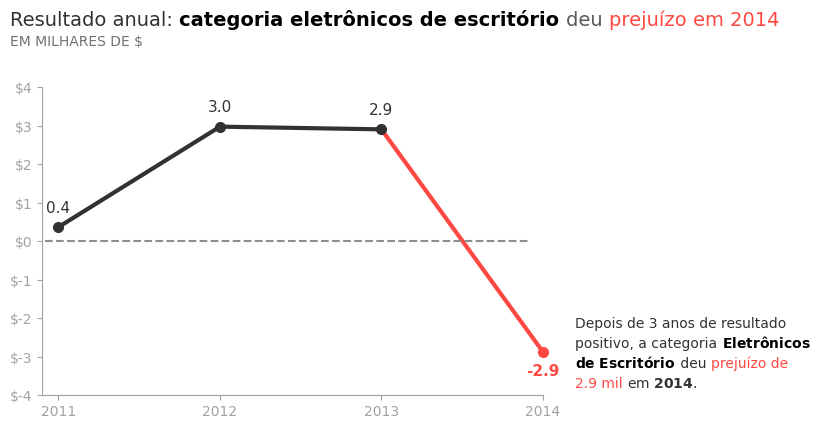

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

def formata_tick(x, pos):
   return f'${x/1000:,.0f}'
ax.plot(eletronicos_escritorio['Ano'][2:], eletronicos_escritorio['Lucro'][2:], color = VERMELHO3, lw = 3)
ax.plot(eletronicos_escritorio['Ano'][0:3], eletronicos_escritorio['Lucro'][0:3], lw = 3, color = CINZA1, marker = 'o', markersize = 7)
ax.plot(eletronicos_escritorio['Ano'][3], eletronicos_escritorio['Lucro'][3], marker = 'o', markersize = 7, color = VERMELHO3)

ax.set_title('EM MILHARES DE $', fontsize = 10, color = CINZA3, loc = 'left', pad = 30)
text = ax.text(x = 0, y = 1.2, s = 'Resultado anual: ', fontsize = 14, color = CINZA1, transform = ax.transAxes)
text = ax.annotate('categoria eletrônicos de escritório ',xycoords=text, xy=(1, 0), verticalalignment="bottom", fontsize = 14, color = 'k', weight = 'bold')
text = ax.annotate('deu ',xycoords=text, xy=(1, 0), verticalalignment="bottom", fontsize = 14, color = CINZA2)
ax.annotate('prejuízo em 2014', xycoords=text, xy = (1, 0), verticalalignment="bottom", fontsize = 14, color = VERMELHO3)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_xlim(2010.7, 2015.5)
ax.yaxis.set_major_locator(plt.MultipleLocator(1e3))
ax.set_xlabel('')
ax.set_ylabel('')
ax.yaxis.set_major_formatter(formata_tick)
ax.tick_params(axis = 'x', which='both', color = CINZA5, direction = 'out')
ax.tick_params(axis = 'y', which='both', color = CINZA5)
ax.xaxis.set_tick_params(labelsize=10, labelcolor = CINZA5)
ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA5)
ax.spines[['bottom', 'left']].set_color(CINZA5)
ax.spines[['right', 'top']].set_visible(False)
ax.set_ylim(-4e3, 4e3)


ax.axhline(0, xmin = 0.045, xmax = 0.67, linestyle = '--', color = CINZA4)
ax.text(x = eletronicos_escritorio['Ano'][3] + 0.1, y = eletronicos_escritorio['Lucro'][3] - 300, s = f"{eletronicos_escritorio['Lucro'][3]/1000:.1f}", color = VERMELHO3, fontsize = 11, ha = 'right', va = 'top', weight = 'bold')

for i in range(0, len(eletronicos_escritorio['Lucro'][0:3])):
  ax.text(x = eletronicos_escritorio['Ano'][i], y = eletronicos_escritorio['Lucro'][i] + 300, s =  f"{eletronicos_escritorio['Lucro'][i]/1000:.1f}", color = CINZA1, fontsize = 11, ha = 'center', va = 'bottom')

texto_colorido(2014.2, -3.8e3,
               'Depois de 3 anos de resultado\n'
               'positivo, a categoria ||$\\bf{Eletrônicos}$\n'
               '$\\bf{de\ Escritório}$ || deu ||prejuízo de\n'
               '2.9 mil ||em $\\bf{2014}$.',
               cores = [[CINZA1], [CINZA1, 'k'],['k', CINZA1, VERMELHO3], [VERMELHO3, CINZA1]],
               esp = 20,
               ax = ax,
               fontsize = 10)

ax.spines.bottom.set_bounds(2010.9, 2014)
ax.spines.left.set_position(('data', 2010.9))
ax.set_xticks([2011, 2012, 2013, 2014])
plt.show()

In [ ]:
margem_lucro = df.copy()
margem_lucro = margem_lucro.query('Ano == 2014')
margem_lucro = margem_lucro.groupby('Categoria')[['Vendas', 'Lucro']].sum().sort_values('Lucro', ascending = False).reset_index()
margem_lucro['Margem'] = margem_lucro['Lucro'] / margem_lucro['Vendas'] * 100
margem_lucro['Margem'] = margem_lucro['Margem'].round(1)
margem_lucro = margem_lucro[:13].sort_values('Margem', ascending = False)

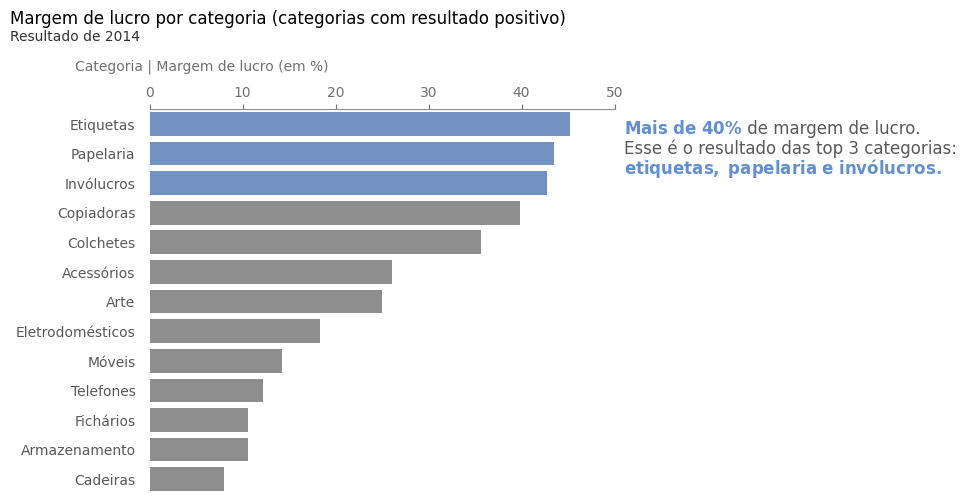

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))

cores = [AZUL2, AZUL2, AZUL2, CINZA4, CINZA4, CINZA4, CINZA4, CINZA4, CINZA4, CINZA4, CINZA4, CINZA4, CINZA4]

ax = sns.barplot(data = margem_lucro, x = 'Margem', y = 'Categoria', hue = 'Categoria', palette = cores, width=0.8)
ax.set_title('Margem de lucro por categoria (categorias com resultado positivo)', fontsize = 12, color = 'k', loc = 'left', x = - 0.3, y= 1.2)
ax.text(x = -15, y = -2.8, s = 'Resultado de 2014', color = CINZA1)
ax.text(x = -8, y = -1.8, s = 'Categoria | Margem de lucro (em %)', color = CINZA3)

ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_ticks_position("top")
ax.spines[['right', 'left', 'bottom']].set_visible(False)
ax.tick_params(axis = 'y', which='both', length = 0)
ax.xaxis.set_tick_params(labelsize=10, labelcolor = CINZA3)
ax.tick_params(axis = 'x', which='both', color = CINZA3, direction = 'out')
ax.yaxis.set_tick_params(labelcolor = CINZA2, pad = 10)
ax.spines[['top']].set_color(CINZA4)
ax.set_xlim(0, 50)

texto_colorido(51, 1.7,
               '$\\bf{Mais\ de\ 40\%}$|| de margem de lucro.\n'
               'Esse é o resultado das top 3 categorias:\n'
               '$\\bf{etiquetas,\ papelaria\ e\ invólucros.}$',
               cores = [[AZUL2, CINZA2], [CINZA2], [AZUL2]],
               esp = 20,
               ax = ax,
               fontsize = 12)



plt.show()

In [ ]:
tipo_entrega = pd.crosstab(index = df['Seguimento'], columns = df['Tipo_envio'], aggfunc='count', values = df['Tipo_envio'], normalize = 'index') * 100
tipo_entrega = tipo_entrega.round(1)
tipo_entrega.sort_values(by = 'B2B', axis = 1, ascending = False, inplace = True)

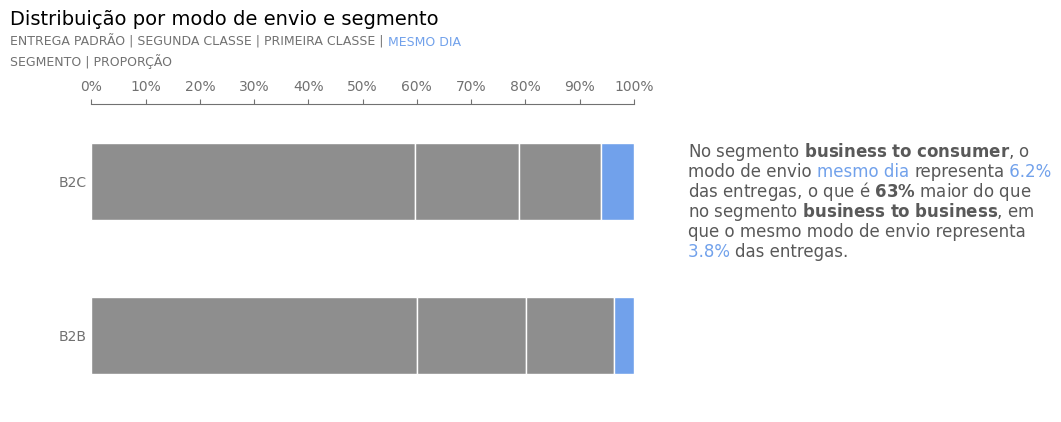

In [ ]:
fig, ax = plt.subplots(figsize = (7, 4))

def formata_tick(x, pos):
   return f'{x:.0f}%'

cores = [CINZA4, CINZA4, CINZA4, AZUL3]

tipo_entrega.plot(kind = 'barh', stacked = True, ax = ax, color = cores, ec = 'white')

ax.set_title('Distribuição por modo de envio e segmento', fontsize = 14, color = 'k', loc = 'left', x = -0.15, y = 1.23)
ax.text(x = -15, y = 1.75, s = 'SEGMENTO | PROPORÇÃO', color = CINZA3, fontsize = 9)
text = ax.text(x = -15, y = 1.88, s = 'ENTREGA PADRÃO | SEGUNDA CLASSE | PRIMEIRA CLASSE | ', color = CINZA3, fontsize = 9)
ax.annotate('MESMO DIA', xycoords=text, xy = (1, 0), color = AZUL3,  verticalalignment="bottom", fontsize = 9)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_ylabel('')
ax.xaxis.set_ticks_position('top')
ax.spines[['left', 'right', 'bottom']].set_visible(False)
ax.tick_params(axis = 'x', which = 'both', color = CINZA3)
ax.xaxis.set_major_formatter(formata_tick)
ax.tick_params(axis = 'y', which = 'both', length = 0)
ax.xaxis.set_tick_params(labelcolor = CINZA3)
ax.yaxis.set_tick_params(labelcolor = CINZA3)
ax.spines[['top']].set_color(CINZA3)
ax.set_xlim(0, 100)
ax.legend().remove()

texto_colorido(110, 0.51,
               'No segmento $\\bf{business\ to\ consumer}$, o\n'
               'modo de envio ||mesmo dia ||representa|| 6.2%\n'
               'das entregas, o que é $\\bf{63\%}$ maior do que\n'
               'no segmento $\\bf{business\ to\ business}$, em\n'
               'que o mesmo modo de envio representa\n'
               '3.8% ||das entregas.',
               cores = [[CINZA2], [CINZA2, AZUL3, CINZA2, AZUL3], [CINZA2], [CINZA2], [CINZA2], [AZUL3, CINZA2]],
               ax=ax,
               esp = 20,
               fontsize = 12)

plt.show()

In [ ]:
vendas_mensais = df.copy()
vendas_mensais = df[['Data_pedido', 'Vendas']]

vendas_mensais.set_index('Data_pedido', inplace=True)
vendas_mensais = vendas_mensais.resample('ME').agg('count')
vendas_mensais = vendas_mensais.reset_index()
vendas_mensais['Mês'] = vendas_mensais['Data_pedido'].dt.month_name()

vendas_2014 = vendas_mensais[vendas_mensais['Data_pedido'].dt.year == 2014]
vendas_2014.reset_index(inplace = True, drop = True)

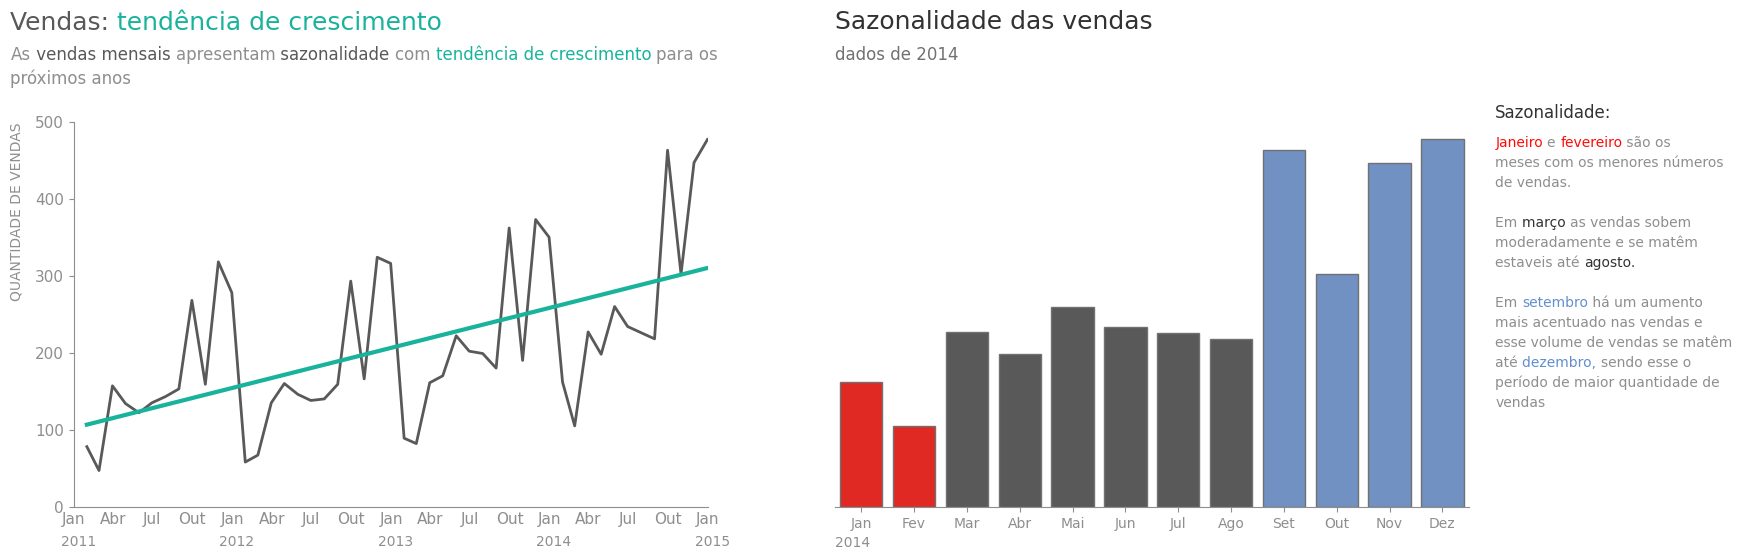

In [ ]:
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(1, 2, figsize = (18, 5), sharey= True)

ax[0].plot(vendas_mensais['Data_pedido'], vendas_mensais['Vendas'], color = CINZA2, lw = 2)
x = mdates.date2num(vendas_mensais['Data_pedido'])
y = vendas_mensais['Vendas']
z = np.polyfit(x, vendas_mensais['Vendas'], 1)
p = np.poly1d(z)

ax[0].plot(x, p(x), "-", color = VERDE3, lw = 3)

text = ax[0].text(x = -0.1, y = 1.24, s = 'Vendas: ', color = CINZA2, fontsize = 18, transform = ax[0].transAxes)
ax[0].annotate('tendência de crescimento', xycoords=text, xy=(1,0), verticalalignment="bottom", fontsize = 18, color = VERDE3)
text = ax[0].text(x = -0.1, y = 1.16, s = 'As', color = CINZA4, fontsize = 12, transform = ax[0].transAxes)
text = ax[0].annotate(' vendas mensais ', xycoords = text, xy=(1, 0), verticalalignment = 'bottom', fontsize = 12, color = CINZA2)
text = ax[0].annotate('apresentam', xycoords = text, xy=(1, 0), verticalalignment = 'bottom', fontsize = 12, color = CINZA4)
text = ax[0].annotate(' sazonalidade ', xycoords = text, xy=(1, 0), verticalalignment = 'bottom', fontsize = 12, color = CINZA2)
text = ax[0].annotate('com ', xycoords = text, xy=(1, 0), verticalalignment = 'bottom', fontsize = 12, color = CINZA4)
text = ax[0].annotate('tendência de crescimento ', xycoords = text, xy=(1, 0), verticalalignment = 'bottom', fontsize = 12, color = VERDE3)
ax[0].annotate('para os', xycoords = text, xy=(1, 0), verticalalignment = 'bottom', fontsize = 12, color = CINZA4)
ax[0].text(x = -0.1, y = 1.1, s = 'próximos anos', fontsize = 12, color = CINZA4, transform = ax[0].transAxes)

ax[0].set_ylabel('QUANTIDADE DE VENDAS', color = CINZA4, fontsize = 10, labelpad = 8, loc = 'top')
ax[0].spines[['top', 'right']].set_visible(False)
ax[0].xaxis.set_tick_params(rotation = 0)
ax[0].set_xlabel('')
ax[0].set_ylim(0, 500)
ax[0].set_xlim([datetime.date(2011, 1, 1), datetime.date(2015, 1, 1)])
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
x_labels = ['Jan', 'Abr', 'Jul', 'Out'] * 4
x_labels.append('Jan')
ax[0].yaxis.set_major_locator(plt.MultipleLocator(100))
ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval = 3))
ax[0].set_xticklabels(x_labels)
ax[0].xaxis.set_tick_params(length = 0)
ax[0].tick_params(axis = 'both', color = CINZA4, labelcolor = CINZA4, labelsize = 11)
ax[0].spines[['left', 'bottom']].set_color(CINZA4)

ano = 2011

for i in range(0, len(ax[0].get_xticklabels(which = 'major'))):
  if ax[0].get_xticklabels(which = 'major')[i].get_text() == 'Jan':
    ax[0].text(x = ax[0].get_xticklabels(which = 'major')[i].get_position()[0] - 30, y = - 50, s = ano, color = CINZA4, fontsize = 10)
    ano += 1


cores = [VERMELHO2, VERMELHO2, CINZA2, CINZA2, CINZA2, CINZA2, CINZA2, CINZA2, AZUL2, AZUL2, AZUL2, AZUL2]

ax[1] = sns.barplot(data = vendas_2014, x = 'Mês', y = 'Vendas', palette = cores, hue = 'Mês', ec = CINZA3)

ax[1].set_title('Sazonalidade das vendas', fontsize = 18, color = CINZA1, loc = 'left', x = 0, y = 1.22)
ax[1].text(x = 0, y = 1.16, s = 'dados de 2014', fontsize = 12, color = CINZA3, transform = ax[1].transAxes)
ax[1].text(x = 12, y = 500, s = 'Sazonalidade:', fontsize=12, color = CINZA1, va = 'bottom')

ax[1].spines[['left', 'right', 'top']].set_visible(False)
ax[1].set_xlabel('2014', loc = 'left', color = CINZA4)
ax[1].set_xticks(vendas_2014['Mês'])
x_labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
ax[1].set_xticklabels(x_labels)
ax[1].tick_params(axis = 'y', length = 0)
ax[1].tick_params(axis = 'x', color = CINZA4, labelcolor = CINZA4)
ax[1].spines[['bottom']].set_color(CINZA4)

texto_colorido(12,
               130,
               'Janeiro ||e ||fevereiro|| são os\n'         # linha 1
               'meses com os menores números\n'               # linha 2
               'de vendas.\n'
               '\n'                                           # linha 3
               'Em ||março ||as vendas sobem\n'               # linha 4
               'moderadamente e se matêm\n'                   # linha 5
               'estaveis até ||agosto.\n'
               '\n'                                           # linha 6
               'Em ||setembro|| há um aumento\n'              # linha 7
               'mais acentuado nas vendas e\n'                 # linha 8
               'esse volume de vendas se matêm\n'           # linha 9
               'até ||dezembro, ||sendo esse o\n'
               'período de maior quantidade de\n'
               'vendas',                            # linha 10
               [[VERMELHO2, CINZA4, VERMELHO2, CINZA4],       # linha 1
                [CINZA4],                                     # linha 2
                [CINZA4],
                [CINZA4],                                     # linha 3
                [CINZA4, CINZA1, CINZA4],                     # linha 4
                [CINZA4],                                     # linha 5
                [CINZA4, CINZA1],
                [CINZA4],# linha 6
                [CINZA4, AZUL2, CINZA4],                      # linha 7
                [CINZA4],                                     # linha 8
                [CINZA4],                                     # linha 9
                [CINZA4, AZUL2, CINZA4],
                [CINZA4],
                [CINZA4]],                             # linha 10
               ax = ax[1])

plt.show()